In [1]:
#Use a pretrained model on an image to get prediction

# from tensorflow.keras.utils import load_img
# from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-08-16 03:22:18.307502: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-16 03:22:18.351119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-08-16 03:22:20.353397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
model = VGG16()

In [26]:
# model works with input shape 224,224
# Load the image


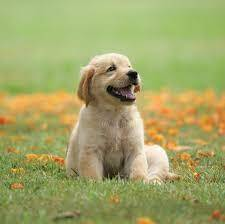

In [3]:
pic = load_img("dog.jpg")
pic

In [4]:
img_to_array(pic).shape

(224, 225, 3)

In [9]:
pic = load_img("dog.jpg",target_size=(224,224))
img_array = img_to_array(pic)
img_array.shape

(224, 224, 3)

In [10]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

In [15]:
model.predict(img_array)

1/1 [==============================] - 0s 158ms/step


array([[4.49991830e-08, 1.38097072e-08, 4.90852905e-08, 9.72509540e-09,
        2.20397411e-07, 1.48040257e-07, 4.09719867e-08, 1.50204778e-06,
        1.23653454e-05, 1.07912221e-07, 2.98701615e-08, 4.07030285e-08,
        3.66256252e-08, 4.13176224e-07, 9.67301474e-08, 2.19533135e-07,
        1.06267372e-07, 1.74622429e-07, 2.94170974e-07, 7.37995407e-08,
        1.16164722e-06, 2.94753795e-06, 4.80851122e-06, 4.13846246e-05,
        8.05268610e-06, 1.42554498e-07, 1.20867369e-07, 7.82958409e-08,
        9.37686480e-08, 1.58507731e-07, 1.34474405e-07, 1.61063454e-07,
        2.12830372e-07, 4.36273297e-07, 1.58897103e-06, 1.85834637e-07,
        5.37712424e-07, 2.38653712e-07, 9.26622818e-07, 1.10759593e-05,
        9.38450455e-08, 1.49396982e-07, 2.94429753e-07, 1.75416261e-07,
        4.50935005e-07, 5.43784211e-07, 1.25994632e-06, 1.19997935e-07,
        9.02692682e-06, 8.23206108e-08, 1.64263653e-07, 1.01716147e-08,
        2.04069053e-07, 6.58143691e-08, 3.43477744e-08, 4.885332

In [13]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 150ms/step


In [14]:
pred.argmax(axis=1)

array([216])

In [ ]:
class_names[pred.argmax(axis=1)[0]]

In [16]:
#Custom Training

vgg_model = VGG16(include_top=False,input_shape=(224,224,3))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D, MaxPooling2D


In [29]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 40931137 (156.14 MB)
Trainable params: 26216449 (100.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [31]:
#we have nit
vgg_model=VGG16(include_top=False,input_shape=(224,224,3))

In [23]:
for layer in vgg_model.layers:
    layer.trainable=False

In [32]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 40931137 (156.14 MB)
Trainable params: 40931137 (156.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Add Convolution layer to model
vgg_model=VGG16(include_top=False,input_shape=(224,224,3))
for layer in vgg_model.layers:
    layer.trainable=False

In [55]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(vgg_model)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dense(512,activation='relu'))
model.add(Dense(124,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 5, 64)          294976    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 124)               31868     
                                                                 
 dense_40 (Dense)            (None, 64)                8000      
                                                     

In [ ]:
# Load the data
model.fit()

In [52]:
import tensorflow as tf,pathlib


In [53]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [54]:
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

In [57]:
data_dir = pathlib.Path(data_dir)

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             horizontal_flip=True,
                             width_shift=0.2
                             zoom_range=0.1)